<a href="https://colab.research.google.com/github/Scholokhov/MLJourney/blob/main/nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Make Classification Data

In [26]:
import sklearn
import torch
from torch import nn
from sklearn.datasets import make_circles

In [27]:
n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)
print(f"First 10 samples of X:{X[:5]}"), print(f"First 10 samples of y:{y[:10]}")
len(X), len(y)

First 10 samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 10 samples of y:[1 1 1 1 0 1 1 1 1 0]


(1000, 1000)

In [28]:
#Make Dataframe of the circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


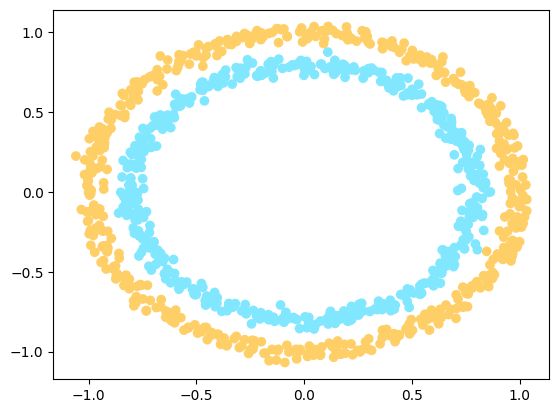

In [29]:
import matplotlib.pyplot as plt
from random import randint
random_color = f"#{randint(0,0xFFFFFF):06x}"
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap="managua")

##Checking input and outpu shapes

In [30]:
X.shape, y.shape

((1000, 2), (1000,))

In [31]:
#View the first example of data

X_sample = X[0]
y_sample = y[0]
print(f"Value of X looks like :{X_sample} while its shape is like {X_sample.shape} and value of y looks like: {y_sample} while its shape is like {y_sample.shape}.")

Value of X looks like :[0.75424625 0.23148074] while its shape is like (2,) and value of y looks like: 1 while its shape is like ().


#Turn data into tensors and change them into train/test splits


In [32]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [33]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [34]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [35]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [36]:
len(X_train), len(X_test)

(800, 200)

##Building a model

*   Setup a device agnostic code
*   Construct a model
*   Define loss function and optimizer
*   Create training and test loop



In [37]:
from torch import nn
#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'



1.   Subclasses 'nn.Module'
2.   Create 2 nn.Linear() layers that are capable of handling the shapes of data
3.   Defines a forward method that outlines the forward pass or computation of the model
4.   Instantiate an instance of model class and send it to a target device


In [38]:
#Construct a model that subclasses nn.Module
class CircleModel(nn.Module):
  def __init():
    super().__init__()
    #Create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5)#takes 2 features and turns them into 5 to pass into the next layer
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)
  #Define a forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x))# x -> layer 1 -> layer 2 -> output
#Instaantian an instance of the model
model_0 = CircleModel().to(device)
model_0

CircleModel()

In [42]:
#Replicating model with nn.Seԛuential
model_0 = torch.nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6580, -0.6689],
                      [-0.5481,  0.1614],
                      [-0.0959,  0.0918],
                      [ 0.6518, -0.4792],
                      [-0.4717,  0.2411]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4240,  0.6890, -0.2237,  0.5922,  0.2727], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2038, -0.2815,  0.4146, -0.2913, -0.1111]], device='cuda:0')),
             ('1.bias', tensor([-0.2075], device='cuda:0'))])

In [54]:
#Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)} and shape:{untrained_preds.shape}")
y_test[:10], untrained_preds[:10]

Length of predictions:200 and shape:torch.Size([200, 1])


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.7456],
         [-0.8155],
         [-0.6633],
         [-0.7685],
         [-0.8236],
         [-0.8651],
         [-0.9349],
         [-0.9469],
         [-0.6566],
         [-0.8220]], device='cuda:0'))

###Setup a loss function and optimizer

*  For regression problems one might use MAE or MSE
*  For classification one might want Binary Cross Entropy or Categorical Cross Entropy

In [ ]:
#Loss Function
loss_fn = nn.BCELoss() #reԛuires input to gone through sigmoid function to operate
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built in